In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans


In [3]:
#import data set
book_data = pd.read_csv('../Daniels_work/final_books.csv')

In [6]:
book_data

,id,title,isbn,page_count,publishing_date,form,publisher,language,author,illustrator,...,genres,subject,awards,nominations,characters,description,sub_title,book_id,average_rating,ratings_count
0,ilINAQAAMAAJ,Kahlil Gibran,"9781566562492, 156656249X",456,1998,Paperback,Interlink Books,English,"Jean Gibran, Kahlil Gibran",NaN,...,NaN,"Authors, Arab -- Biography -- Lebanon -- Unite...",NaN,NaN,NaN,Drawing on masses of new and rediscovered mate...,His Life and World,ilINAQAAMAAJ,NaN,NaN
1,cOpWAQAACAAJ,LogoLounge,NaN,191,September 2004,Paperback,Rockport Publishers,English,"Bill Gardner, Catharine Fishel",NaN,...,NaN,"Design / General, Design / Graphic Arts / Comm...",NaN,NaN,NaN,Logos -- for everything from food and fashion ...,"2,000 International Identities by Leading Desi...",cOpWAQAACAAJ,NaN,NaN
2,JJWMEAAAQBAJ,The Westing Game,"9780142401200, 014240120X",192,2004,Paperback,Penguin Young Readers Group,English,Ellen Raskin,NaN,...,"Novel, Mystery, Humor, Young adult fiction, Ch...",Juvenile Fiction / Family / Marriage & Divorce...,John Newbery Medal,"John Newbery Medal, National Book Award for Ch...","Samuel W. Westing, Berthe Erica Crow, Catherin...","A Newbery Medal Winner\n\n""A supersharp myster...",NaN,JJWMEAAAQBAJ,4.0,1.0
3,cGxOHgpsgX8C,Tyler's Ultimate,"9781400052387, 1400052386",254,2006,Hardcover,Clarkson Potter/Publishers,English,Tyler Florence,NaN,...,NaN,"Cooking, Cooking / Courses & Dishes / General,...",NaN,NaN,NaN,As his millions of fans know from watching him...,Brilliant Simple Food to Make Any Time,cGxOHgpsgX8C,NaN,NaN
4,nF2PcyCJb0UC,Eat this Book,"9781400052370, 1400052378",287,2005,Hardcover,Clarkson Potter/Publishers,English,Tyler Florence,NaN,...,NaN,"Cookery, Cooking, Cooking / Methods / General,...",NaN,NaN,NaN,While traveling the globe as the host of Food ...,Cooking with Global Fresh Flavors,nF2PcyCJb0UC,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3282,tcWMPAAACAAJ,Bella Y Oscura / Beautiful And Dark (Novela (B...,"9788432217289, 843221728X",204,2006,Paperback,Seix Barral,Spanish,Rosa Montero,NaN,...,"Allegory, Domestic Fiction","Domestic fiction, Children -- Fiction -- Spain...",NaN,NaN,NaN,"La historia de la infancia, vivida y soñada, d...",NaN,tcWMPAAACAAJ,NaN,NaN
3283,O2JfAAAAMAAJ,La tía Julia y el escribidor,"9788432203237, 8432203238",447,1977,Hardcover,Seix Barral,Spanish,Mario Vargas Llosa,NaN,...,"Novel, Humorous Fiction","Aunts -- Fiction, Courtship -- Fiction, Love s...",NaN,NaN,NaN,La tía Julia y el escribidor es una novela sem...,NaN,O2JfAAAAMAAJ,NaN,NaN
3284,y4kgSgAACAAJ,O cavalo e o seu rapaz,"9789722330558, 9722330551",NaN,NaN,NaN,Editorial Presença,Portuguese,"C. S. Lewis, Pauline Baynes",Pauline Baynes,...,"Novel, Fantasy, Fantasy Fiction, Children's li...","Children -- Juvenile fiction, Fantasy fiction,...",NaN,NaN,"Shasta, Aravis, Bree, Rabadash, Hwin, Aslan, S...",The Horse and His Boy is a novel for children ...,NaN,y4kgSgAACAAJ,NaN,NaN
3285,TaQZzgEACAAJ,As crónicas de Nárnia,"9789722329989, 9722329987",NaN,NaN,NaN,Editorial Presença,Portuguese,"C. S. Lewis, A. Gonçalves Rodrigues, Ana Falcã...",Pauline Baynes,...,NaN,"Children -- Juvenile fiction, Fantasy fiction,...",NaN,NaN,NaN,NaN,NaN,TaQZzgEACAAJ,NaN,NaN


In [10]:
n = 0

for i in book_data['genres'].isna():
    if i == True:
        n+=1
n

1485

In [13]:
n = 0

for i in book_data['subject'].isna():
    if i == True:
        n+=1
n

193

In [24]:
n = 0

for i in book_data['ratings_count'].isna():
    if i == True:
        n+=1
n

3128

In [26]:
book_data.columns

Index(['id', 'title', 'isbn', 'page_count', 'publishing_date', 'form',
       'publisher', 'language', 'author', 'illustrator',
       'originally_published', 'genres', 'subject', 'awards', 'nominations',
       'characters', 'description', 'sub_title', 'book_id', 'average_rating',
       'ratings_count'],
      dtype='object')

In [27]:
#DROP average_rating, ratings_count, book_id , isbn, illustrator, NaN genres, NaN subjects, nominations, characters, sub_title, originally_published, 

In [28]:
# drop necessary nans
genreNan = book_data.loc[pd.isna(book_data['genres'])]
subNan = book_data.loc[pd.isna(book_data['subject'])]

In [29]:
indexNan = []
for i in genreNan.index:
    indexNan.append(i)
for i in subNan.index:
    indexNan.append(i)


In [30]:
indexNan = [*set(indexNan)]

In [31]:
indexNan.sort()

In [144]:
book_df = book_data.copy()

In [145]:
# drop appropriate nan rows
for i in indexNan:
    book_df = book_df.drop([i])

In [146]:
book_df.head()

,id,title,isbn,page_count,publishing_date,form,publisher,language,author,illustrator,...,genres,subject,awards,nominations,characters,description,sub_title,book_id,average_rating,ratings_count
2,JJWMEAAAQBAJ,The Westing Game,"9780142401200, 014240120X",192,2004,Paperback,Penguin Young Readers Group,English,Ellen Raskin,NaN,...,"Novel, Mystery, Humor, Young adult fiction, Ch...",Juvenile Fiction / Family / Marriage & Divorce...,John Newbery Medal,"John Newbery Medal, National Book Award for Ch...","Samuel W. Westing, Berthe Erica Crow, Catherin...","A Newbery Medal Winner\n\n""A supersharp myster...",NaN,JJWMEAAAQBAJ,4.0,1.0
7,XE0MAAAACAAJ,Confesiones de un chef,"9788466308953, 8466308954",478,2002,Paperback,Suma de Letras,Spanish,Anthony Bourdain,NaN,...,"Biography, Autobiography",Cooks -- Biography -- New York (State) -- New ...,NaN,NaN,NaN,The ever-popular Kitchen Confidential is now a...,NaN,XE0MAAAACAAJ,NaN,NaN
8,iYOMEAAAQBAJ,Metamorphoses,"9780140447897, 014044789X",723,"January 29, 2004",Paperback,Penguin Publishing Group,English,Ovid,NaN,...,"Poetry, Epic poetry","Fiction / Classics, Literary Criticism / Poetr...",NaN,NaN,NaN,"Ovid’s sensuous and witty poem, in an accessib...",NaN,iYOMEAAAQBAJ,NaN,NaN
11,hyqNEAAAQBAJ,Wild About Books,"9780375825385, 037582538X",40,"August 10, 2004",Hardcover,Random House Children's Books,English,Judy Sierra,"Marc Brown, Marc Tolon Brown",...,"Picture book, Fiction","Juvenile Fiction / Animals / Zoos, Juvenile Fi...",NaN,NaN,NaN,OVER HALF A MILLION COPIES SOLD!\n\nWinner of ...,NaN,hyqNEAAAQBAJ,NaN,NaN
14,ryCLuAAACAAJ,"Moby Dick, Or, The White Whale","9780192741561, 019274156X",103,1996,Hardcover,Oxford University Press,English,NaN,Victor G. Ambrus,...,"Epic, Adventure fiction, Nautical fiction","Ahab, Captain (Fictitious character) -- Juveni...",NaN,Audie Award for Literary Fiction & Classics,"Captain Ahab, Ishmael, Queequeg, Moby Dick, Fa...","""There is a whale in the sea, as white as a gh...",NaN,ryCLuAAACAAJ,NaN,NaN


In [147]:
#average_rating, ratings_count, book_id , isbn, illustrator, NaN genres, NaN subjects, nominations, characters, sub_title, originally_published, 

In [168]:
books = book_df.drop(columns=['average_rating', 'ratings_count', 'book_id', 'illustrator', 'nominations', 'characters', 'sub_title', 'originally_published', 'awards'])

In [169]:
books

,id,title,isbn,page_count,publishing_date,form,publisher,language,author,genres,subject,description
2,JJWMEAAAQBAJ,The Westing Game,"9780142401200, 014240120X",192,2004,Paperback,Penguin Young Readers Group,English,Ellen Raskin,"Novel, Mystery, Humor, Young adult fiction, Ch...",Juvenile Fiction / Family / Marriage & Divorce...,"A Newbery Medal Winner\n\n""A supersharp myster..."
7,XE0MAAAACAAJ,Confesiones de un chef,"9788466308953, 8466308954",478,2002,Paperback,Suma de Letras,Spanish,Anthony Bourdain,"Biography, Autobiography",Cooks -- Biography -- New York (State) -- New ...,The ever-popular Kitchen Confidential is now a...
8,iYOMEAAAQBAJ,Metamorphoses,"9780140447897, 014044789X",723,"January 29, 2004",Paperback,Penguin Publishing Group,English,Ovid,"Poetry, Epic poetry","Fiction / Classics, Literary Criticism / Poetr...","Ovid’s sensuous and witty poem, in an accessib..."
11,hyqNEAAAQBAJ,Wild About Books,"9780375825385, 037582538X",40,"August 10, 2004",Hardcover,Random House Children's Books,English,Judy Sierra,"Picture book, Fiction","Juvenile Fiction / Animals / Zoos, Juvenile Fi...",OVER HALF A MILLION COPIES SOLD!\n\nWinner of ...
14,ryCLuAAACAAJ,"Moby Dick, Or, The White Whale","9780192741561, 019274156X",103,1996,Hardcover,Oxford University Press,English,NaN,"Epic, Adventure fiction, Nautical fiction","Ahab, Captain (Fictitious character) -- Juveni...","""There is a whale in the sea, as white as a gh..."
...,...,...,...,...,...,...,...,...,...,...,...,...
3276,4w1vQRkAVxYC,On the road,"9780142437254, 0142437255",307,2003,Paperback,Penguin Publishing Group,English,Jack Kerouac,"Novel, Fiction, Stream of consciousness, Roman...","Fiction / Classics, Fiction / Coming of Age, more",The classic novel of freedom and the search fo...
3277,dHcqAAAAYAAJ,Co. Aytch,"9780684833248, 0684833247",255,1997,Paperback,Simon & Schuster,English,Sam. R. Watkins,"Biography, Personal narrative",United States -- History -- Regimental histori...,"Previously published by Collier, this classic ..."
3282,tcWMPAAACAAJ,Bella Y Oscura / Beautiful And Dark (Novela (B...,"9788432217289, 843221728X",204,2006,Paperback,Seix Barral,Spanish,Rosa Montero,"Allegory, Domestic Fiction","Domestic fiction, Children -- Fiction -- Spain...","La historia de la infancia, vivida y soñada, d..."
3283,O2JfAAAAMAAJ,La tía Julia y el escribidor,"9788432203237, 8432203238",447,1977,Hardcover,Seix Barral,Spanish,Mario Vargas Llosa,"Novel, Humorous Fiction","Aunts -- Fiction, Courtship -- Fiction, Love s...",La tía Julia y el escribidor es una novela sem...


In [170]:
books = books.dropna()
books

,id,title,isbn,page_count,publishing_date,form,publisher,language,author,genres,subject,description
2,JJWMEAAAQBAJ,The Westing Game,"9780142401200, 014240120X",192,2004,Paperback,Penguin Young Readers Group,English,Ellen Raskin,"Novel, Mystery, Humor, Young adult fiction, Ch...",Juvenile Fiction / Family / Marriage & Divorce...,"A Newbery Medal Winner\n\n""A supersharp myster..."
7,XE0MAAAACAAJ,Confesiones de un chef,"9788466308953, 8466308954",478,2002,Paperback,Suma de Letras,Spanish,Anthony Bourdain,"Biography, Autobiography",Cooks -- Biography -- New York (State) -- New ...,The ever-popular Kitchen Confidential is now a...
8,iYOMEAAAQBAJ,Metamorphoses,"9780140447897, 014044789X",723,"January 29, 2004",Paperback,Penguin Publishing Group,English,Ovid,"Poetry, Epic poetry","Fiction / Classics, Literary Criticism / Poetr...","Ovid’s sensuous and witty poem, in an accessib..."
11,hyqNEAAAQBAJ,Wild About Books,"9780375825385, 037582538X",40,"August 10, 2004",Hardcover,Random House Children's Books,English,Judy Sierra,"Picture book, Fiction","Juvenile Fiction / Animals / Zoos, Juvenile Fi...",OVER HALF A MILLION COPIES SOLD!\n\nWinner of ...
18,asGjNgAACAAJ,A People's History of the United States,"9781565847255, 1565847253",496,2003,Paperback,New Press,English,"Howard Zinn, Kathy Emery, Ellen Reeves","Textbook, Non-fiction",Education / Teaching / Subjects / Arts & Human...,An abridged classroom edition of Howard Zinn's...
...,...,...,...,...,...,...,...,...,...,...,...,...
3273,KWVrvgEACAAJ,Artemis Fowl,"9780307344670, 0307344673",368,"November 1, 2005",Trade paperback,Montena,Spanish,Eoin Colfer,"Fantasy Fiction, Children's literature","England -- Juvenile fiction, Fairies -- Juveni...","Artemis Fowl and the Opal Deception, known in ..."
3276,4w1vQRkAVxYC,On the road,"9780142437254, 0142437255",307,2003,Paperback,Penguin Publishing Group,English,Jack Kerouac,"Novel, Fiction, Stream of consciousness, Roman...","Fiction / Classics, Fiction / Coming of Age, more",The classic novel of freedom and the search fo...
3277,dHcqAAAAYAAJ,Co. Aytch,"9780684833248, 0684833247",255,1997,Paperback,Simon & Schuster,English,Sam. R. Watkins,"Biography, Personal narrative",United States -- History -- Regimental histori...,"Previously published by Collier, this classic ..."
3282,tcWMPAAACAAJ,Bella Y Oscura / Beautiful And Dark (Novela (B...,"9788432217289, 843221728X",204,2006,Paperback,Seix Barral,Spanish,Rosa Montero,"Allegory, Domestic Fiction","Domestic fiction, Children -- Fiction -- Spain...","La historia de la infancia, vivida y soñada, d..."


In [171]:
b = books.drop(columns=['id', 'isbn'])

In [172]:
dummies = pd.get_dummies(b)

In [61]:
# https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.TruncatedSVD.html
from sklearn.decomposition import TruncatedSVD 

In [173]:
matrix_dense = dummies.to_numpy()

In [174]:
dummies

,"title_""What Do You Care what Other People Think?""","title_, Said the Shotgun to the Head.",title_10 Things I Hate About You,title_13 Little Blue Envelopes,title_1632,title_1776,title_1984,"title_20,000 Leagues Under the Sea",title_A Bend in the River,title_A Bend in the Road,...,"description_“The wildest, strangest, best Dresden adventure to date...Butcher’s blending of modern fantasy with classic noir sensibilities ensures that there’s never a dull moment.”—SF Site\n \nParanormal investigations are Harry Dresden’s business and Chicago is his beat, as he tries to bring law and order to a world of wizards and monsters that exists alongside everyday life. And though most inhabitants of the Windy City don’t believe in magic, the Special Investigations Department of the Chicago PD knows better.\n \nKarrin Murphy is the head of S. I. and Harry’s good friend. So when a killer vampire threatens to destroy Murphy’s reputation unless Harry does her bidding, he has no choice. The vampire wants the Word of Kemmler (whatever that is) and all the power that comes with it. Now, Harry is in a race against time—and six merciless necromancers—to find the Word before Chicago experiences a Halloween night to wake the dead...","description_“The words say 'It’s not easy being green,' but the song is about knowing who you are. And in it you hear Jim’s message most clearly. He believed that people are good and that they want to do their best and that no matter how or why we might be different from anybody else, we should learn to love who we are and be proud of it.”\n—Ray Charles\n\nIn the tradition of The World According to Mister Rogers, a timeless collection of wisdom on life, friendship, individuality, creativity, collaboration, and more -- from Jim Henson and Friends\n\nThere are few things that evoke such a universal feeling of warmth and humor as the work of Jim Henson. In his own words, as well as those of some of his best-known characters like Kermit the Frog and Ernie, we get a glimpse of the philoso...","description_“Truly remarkable . . . encompasses the longings and agonies of youth . . . a complex and moving novel.”—Time\n\n“Astonishing . . . a writer of uncommon imaginative power. Whatever [John Irving] writes, it will be worth reading.”—Saturday Review\n\nIt is 1967. Two Viennese university students, Siggy and Hannes, roam the Austrian countryside on their motorcycles—on a quest: to liberate the bears of the Vienna Zoo. But their good intentions have both comic and gruesome consequences in this first novel from John Irving, already a master storyteller at twenty-five years old.\n\n“Imagine a mixture of Till Eulenspiegel and Ken Kesey . . . and you've got the range of the merry pranksters who hot rod through Mr. Irving's book . . . tossing flowers, stealing salt shakers, and planning the biggest caper of their young lives.”—The New York Times","description_“Witness the coming together of Truman Capote’s voice, the electric-into-neon blaze that is surely one of the premier styles of postwar American literature.”—The Washington Post Book World\n\n“A great breezy read . . . with Capote’s trademark wit, but also with genuine youthful awe at the exhilaration of late-forties New York.”—New York\n\nA lost treasure only recently found, Truman Capote’s Summer Crossing is a precocious, confident first novel from one of the twentieth century’s greatest writers.\n\nSet in New York just after World War II, the story follows a young carefree socialite, Grady McNeil, whose parents leave her alone in their Fifth Avenue penthouse for the summer. Left to her own devices, Grady turns up the heat on the secret affair she’s been having wit...","description_“You either love Andrea Camilleri or you haven’t read him yet. Each novel in this wholly addictive, entirely magical series, set in Sicily and starring a detective unlike any other in crime fiction, blasts the brain like a shot of pure oxygen. Aglow with local color, packed with flint-dry wit, as fr

In [175]:
dummies['title'] = list(books['title'])

In [176]:
dummies.drop(columns=['title'], inplace=True)

In [177]:
svd = TruncatedSVD(n_components=2)

In [178]:
svd.fit(matrix_dense)

TruncatedSVD()

In [179]:
matrix_reduced = svd.transform(matrix_dense)

In [180]:
np.mean(matrix_reduced, axis=0)

array([1.26014477, 0.08000605])

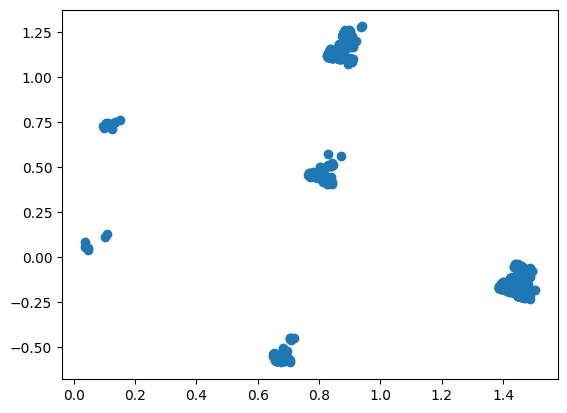

In [181]:
plt.scatter(matrix_reduced[:,0], matrix_reduced[:,1])

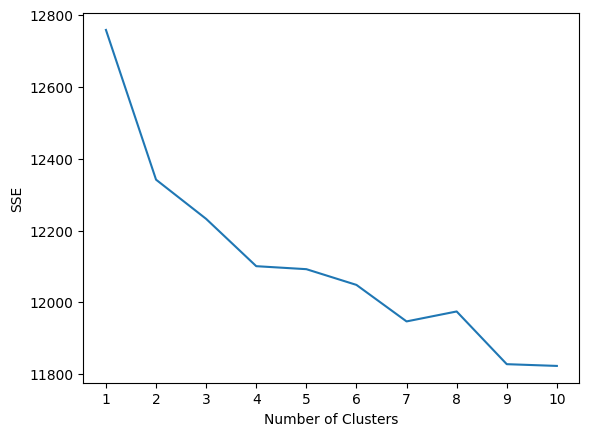

In [182]:
#initialize kmeans parameters
kmeans_kwargs = {
"init": "random",
"n_init": 10,
"random_state": 1,
}

#create list to hold SSE values for each k
sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(dummies)
    sse.append(kmeans.inertia_)

#visualize results
plt.plot(range(1, 11), sse)
plt.xticks(range(1, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.show()#

In [183]:
k = 5

In [184]:
cluster_model = KMeans(n_clusters=k)

In [185]:
cluster_model.fit(matrix_reduced)

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=5)

In [186]:
books['cluster'] = cluster_model.labels_
dummies['cluster'] = cluster_model.labels_

/var/folders/1v/jxz0vfs91r590633ws8rsh7r0000gn/T/ipykernel_89296/2937948069.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  books['cluster'] = cluster_model.labels_


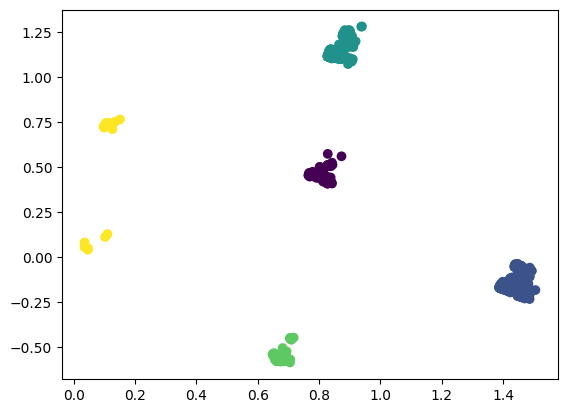

In [230]:
plt.scatter(matrix_reduced[:,0], matrix_reduced[:,1], c=dummies["cluster"])

In [75]:
from sklearn.metrics import DistanceMetric

In [202]:
x=[]
isbns = books['isbn']
for i in list(isbns):
    x.append(int(i.split(',')[0]))

#b['isbn'] = l
dummies['isbn'] = x

In [217]:
books['new_isbns'] = x

/var/folders/1v/jxz0vfs91r590633ws8rsh7r0000gn/T/ipykernel_89296/2758151863.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  books['new_isbns'] = x


In [210]:
isbns = x
sims = []
for n in isbns:
    s = []
    book = dummies.loc[dummies['isbn'] == n]
    #stats_df = df2.drop(columns=['Name', 'Team'])
    for col in book:
        l = list(book[col])
        s.append(l[0])
    sims.append(s)

In [211]:
dist = DistanceMetric.get_metric('euclidean')
sims = dist.pairwise(sims)

In [212]:
test_sims = {}
for i in range(len(sims)):
    test_sims[isbns[i]] = sims[i][0]

In [213]:
top5 = sorted(test_sims.items(), key=lambda x:x[1])[0:6]

In [214]:
for i in top5:
    print(i)

(9780142401200, 0.0)
(9780142403013, 1813.0052399262393)
(9780142403228, 2028.0034516735911)
(9780142437186, 35986.00022230868)
(9780142437254, 36054.000221889386)
(9780142501092, 99892.0000850919)


In [234]:
books.loc[(books['new_isbns'] == 9780142401200) | (books['new_isbns'] == 9780142403013) | (books['new_isbns'] == 9780142403228) | (books['new_isbns'] == 9780142437186) | (books['new_isbns'] == 9780142437354) | (books['new_isbns'] == 9780142501092)]

,id,title,isbn,page_count,publishing_date,form,publisher,language,author,genres,subject,description,cluster,new_isbns
2,JJWMEAAAQBAJ,The Westing Game,"9780142401200, 014240120X",192,2004,Paperback,Penguin Young Readers Group,English,Ellen Raskin,"Novel, Mystery, Humor, Young adult fiction, Ch...",Juvenile Fiction / Family / Marriage & Divorce...,"A Newbery Medal Winner\n\n""A supersharp myster...",1,9780142401200
1240,gou9wAEACAAJ,Siddhartha,"9780142437186, 0142437182",176,2002,Paperback,Penguin Publishing Group,English,Hermann Hesse,"Novel, Philosophical fiction","Religion / Buddhism / History, Religion / Spir...",A bold translation of Nobel Prize-winner Herma...,1,9780142437186
1350,yo1cY74uabMC,The Legend of Luke,"9780142501092, 0142501093",384,"June 2, 2005",Trade paperback,Penguin Young Readers Group,English,Brian Jacques,"Fantasy, Fantasy Fiction, Children's literature",Juvenile Fiction / Action & Adventure / Genera...,The Redwall series is soon to be a Netflix ori...,0,9780142501092
2071,wS-Xhel9LLUC,Moon-flash,"9780142403013, 0142403016",298,March 2005,Trade paperback,Firebird,English,Patricia A. McKillip,"Science fiction, Fantasy Fiction","Bildungsromans, Dreams -- Juvenile fiction, In...",This omnibus edition combines the acclaimed Pa...,0,9780142403013
2864,jgGTEAAAQBAJ,The Night Journey,"9780142403228, 0142403229",160,"March 17, 2005",Paperback,Penguin Young Readers Group,English,Kathryn Lasky,"Children's literature, Historical Fiction, his...",Juvenile Fiction / Action & Adventure / Surviv...,Thirteen-year-old Rachel dreads the afternoons...,1,9780142403228


In [219]:
#Check clusters
for i in top5:
    isbn = i[0]
    row = books.loc[books['new_isbns'] == isbn]
    print(list(row['cluster']))

[1]
[0]
[1]
[1]
[1]
[0]


In [216]:
books['cluster']

2       1
7       3
8       1
11      2
18      1
       ..
3273    4
3276    1
3277    1
3282    3
3283    4
Name: cluster, Length: 1518, dtype: int32